In [2]:
from google.colab import drive
import pandas as pd

# 挂载Google Drive
drive.mount('/content/drive')

# 指定文件路径
file1_path = '/content/drive/MyDrive/ExioML_factor_accounting_IxI.csv'
file2_path = '/content/drive/MyDrive/ExioML_factor_accounting_PxP.csv'

# 加载数据
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# 合并数据
merged_df = pd.concat([df1, df2], ignore_index=True)
print(merged_df.head())


Mounted at /content/drive
  region                                  sector  Value Added [M.EUR]  \
0     AT                    Cultivation of wheat           183.111889   
1     AT        Cultivation of cereal grains nec           402.230580   
2     AT  Cultivation of vegetables, fruit, nuts           830.212738   
3     AT                Cultivation of oil seeds           101.970543   
4     AT   Cultivation of sugar cane, sugar beet            31.763189   

   Employment [1000 p.]  GHG emissions [kg CO2 eq.]  \
0             13.187442                3.478740e+08   
1             25.673157                6.847488e+08   
2             48.616948                2.389458e+08   
3              2.867099                1.197554e+08   
4              3.142473                7.751692e+07   

   Energy Carrier Net Total [TJ]  Year  
0                         2070.0  1995  
1                         3640.0  1995  
2                         2975.0  1995  
3                          265.0  1995  

In [3]:
# 查看合并后的数据集的行数和列数
rows, cols = merged_df.shape
print(f"合并后的数据有 {rows} 行和 {cols} 列")
# 查看前7列的列名
columns = merged_df.columns[:7]
print("前7列的列名是：")
print(columns)


合并后的数据有 400491 行和 7 列
前7列的列名是：
Index(['region', 'sector', 'Value Added [M.EUR]', 'Employment [1000 p.]',
       'GHG emissions [kg CO2 eq.]', 'Energy Carrier Net Total [TJ]', 'Year'],
      dtype='object')


In [4]:
!pip install pycountry geopandas
!apt-get install -y libspatialindex-dev
!pip install geopandas pycountry rtree

import pycountry
import geopandas as gpd
print("Libraries installed successfully!")

import geopandas as gpd

# 加载世界地图数据
shapefile_path = "/content/drive/MyDrive/A&O/ne_110m_admin_0_countries.shp"  # 替换为实际路径
world = gpd.read_file(shapefile_path)

# 检查地图数据
print(world.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (322 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 123630 files and directories currently i

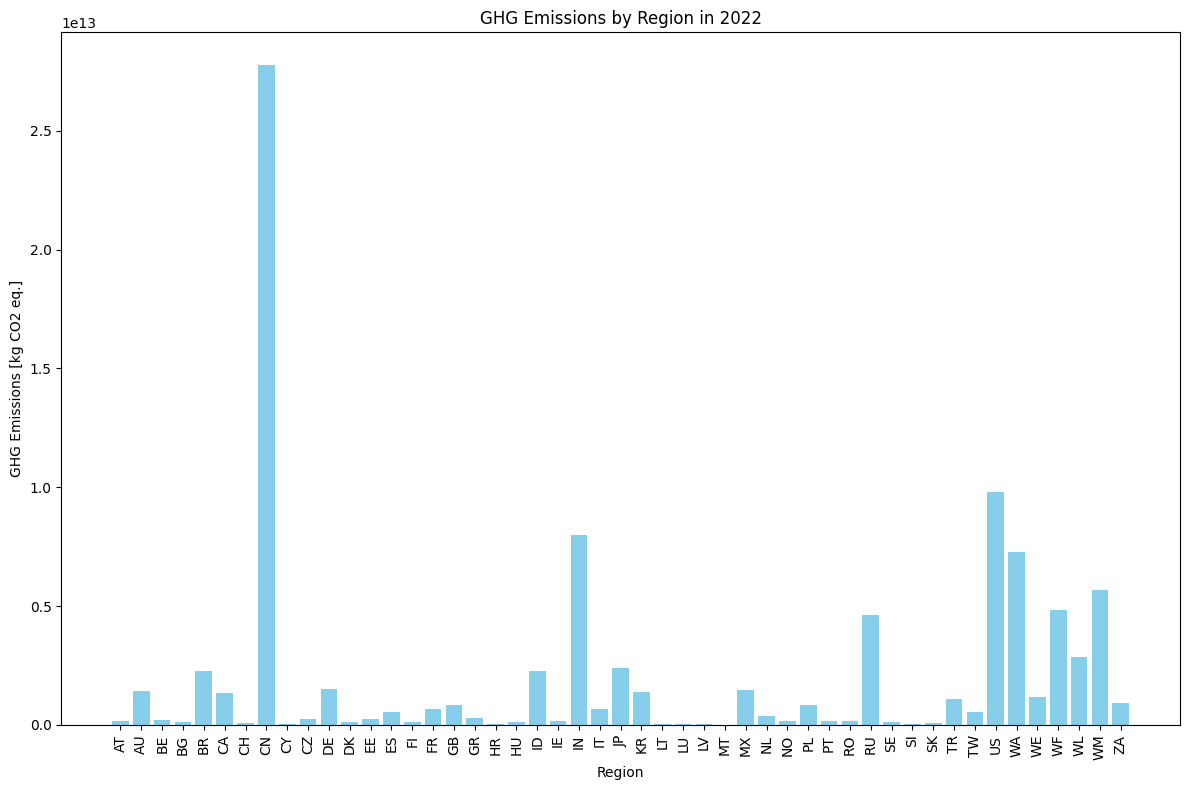

In [5]:
import matplotlib.pyplot as plt

# 过滤出2022年的数据
data_2022 = merged_df[merged_df['Year'] == 2022]

# 按region分组，计算GHG emissions的总和
ghg_by_region = data_2022.groupby('region')['GHG emissions [kg CO2 eq.]'].sum().reset_index()

# 绘制条形图
plt.figure(figsize=(12, 8))
plt.bar(ghg_by_region['region'], ghg_by_region['GHG emissions [kg CO2 eq.]'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('GHG Emissions [kg CO2 eq.]')
plt.title('GHG Emissions by Region in 2022')
plt.tight_layout()
plt.show()


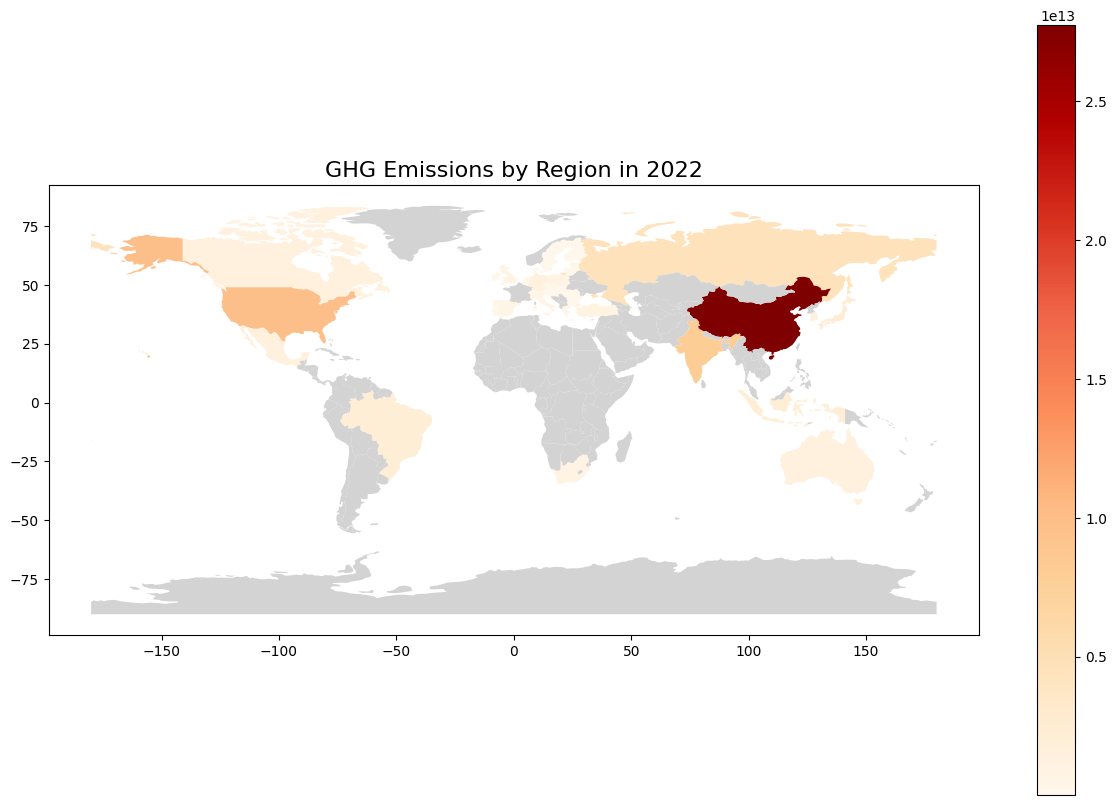

In [5]:
import geopandas as gpd

# 加载世界地图数据
shapefile_path = "/content/drive/MyDrive/A&O/ne_110m_admin_0_countries.shp"  # 替换为实际路径
world = gpd.read_file(shapefile_path)

# 合并地图数据和GHG数据
map_data = world.merge(ghg_by_region, how='left', left_on='ISO_A2', right_on='region')

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map_data.plot(column='GHG emissions [kg CO2 eq.]',
              cmap='OrRd',
              legend=True,
              ax=ax,
              missing_kwds={"color": "lightgrey", "label": "No data"})
plt.title('GHG Emissions by Region in 2022', fontsize=16)
plt.show()


<ipython-input-6-113b1c544cb7>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

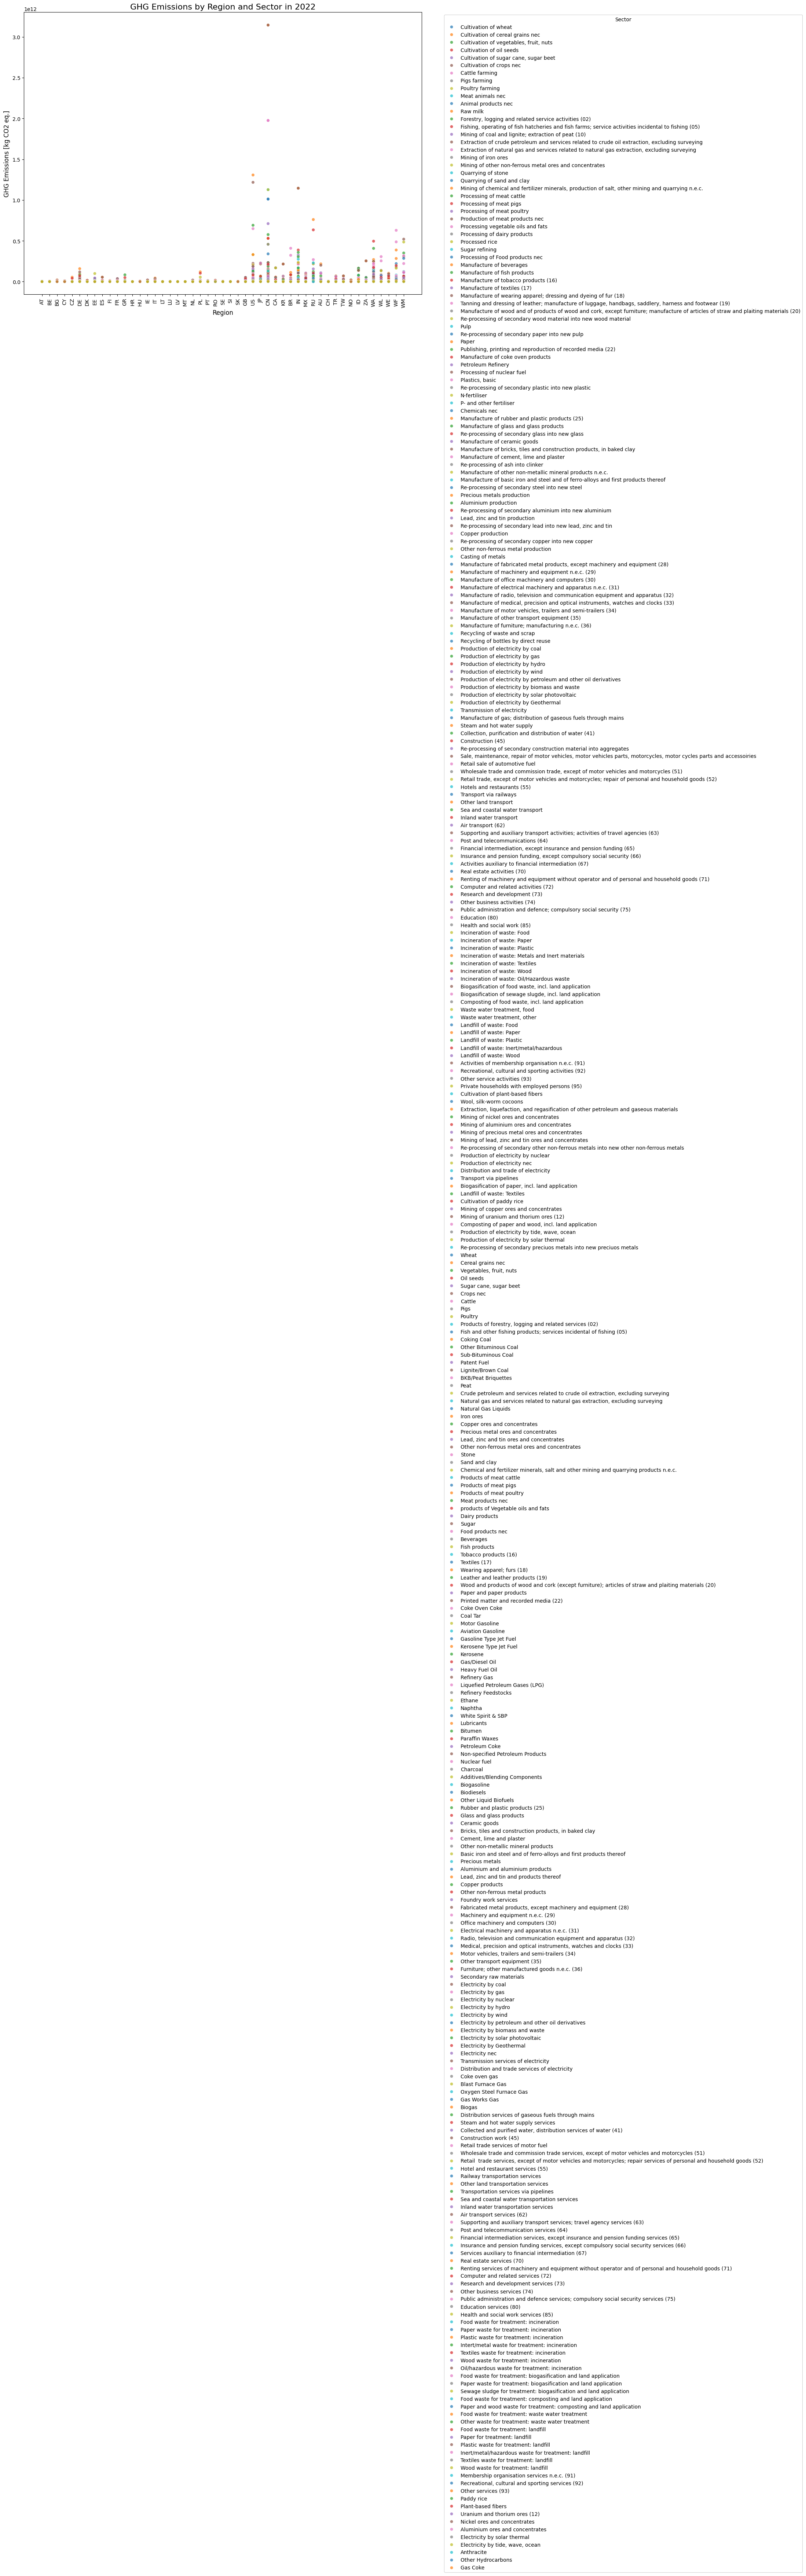

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 过滤2022年的数据
data_2022 = merged_df[merged_df['Year'] == 2022]

# 设置图形尺寸
plt.figure(figsize=(14, 10))

# 使用Seaborn绘制散点图，颜色表示不同的sector
sns.scatterplot(
    data=data_2022,
    x='region',  # X轴为区域
    y='GHG emissions [kg CO2 eq.]',  # Y轴为GHG排放
    hue='sector',  # 颜色表示不同的sector
    palette='tab10',  # 调色板
    alpha=0.7  # 设置透明度
)

# 调整X轴标签
plt.xticks(rotation=90)

# 添加图表标题和坐标轴标签
plt.title('GHG Emissions by Region and Sector in 2022', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('GHG Emissions [kg CO2 eq.]', fontsize=12)

# 添加图例
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.tight_layout()
plt


<Figure size 1600x1000 with 0 Axes>

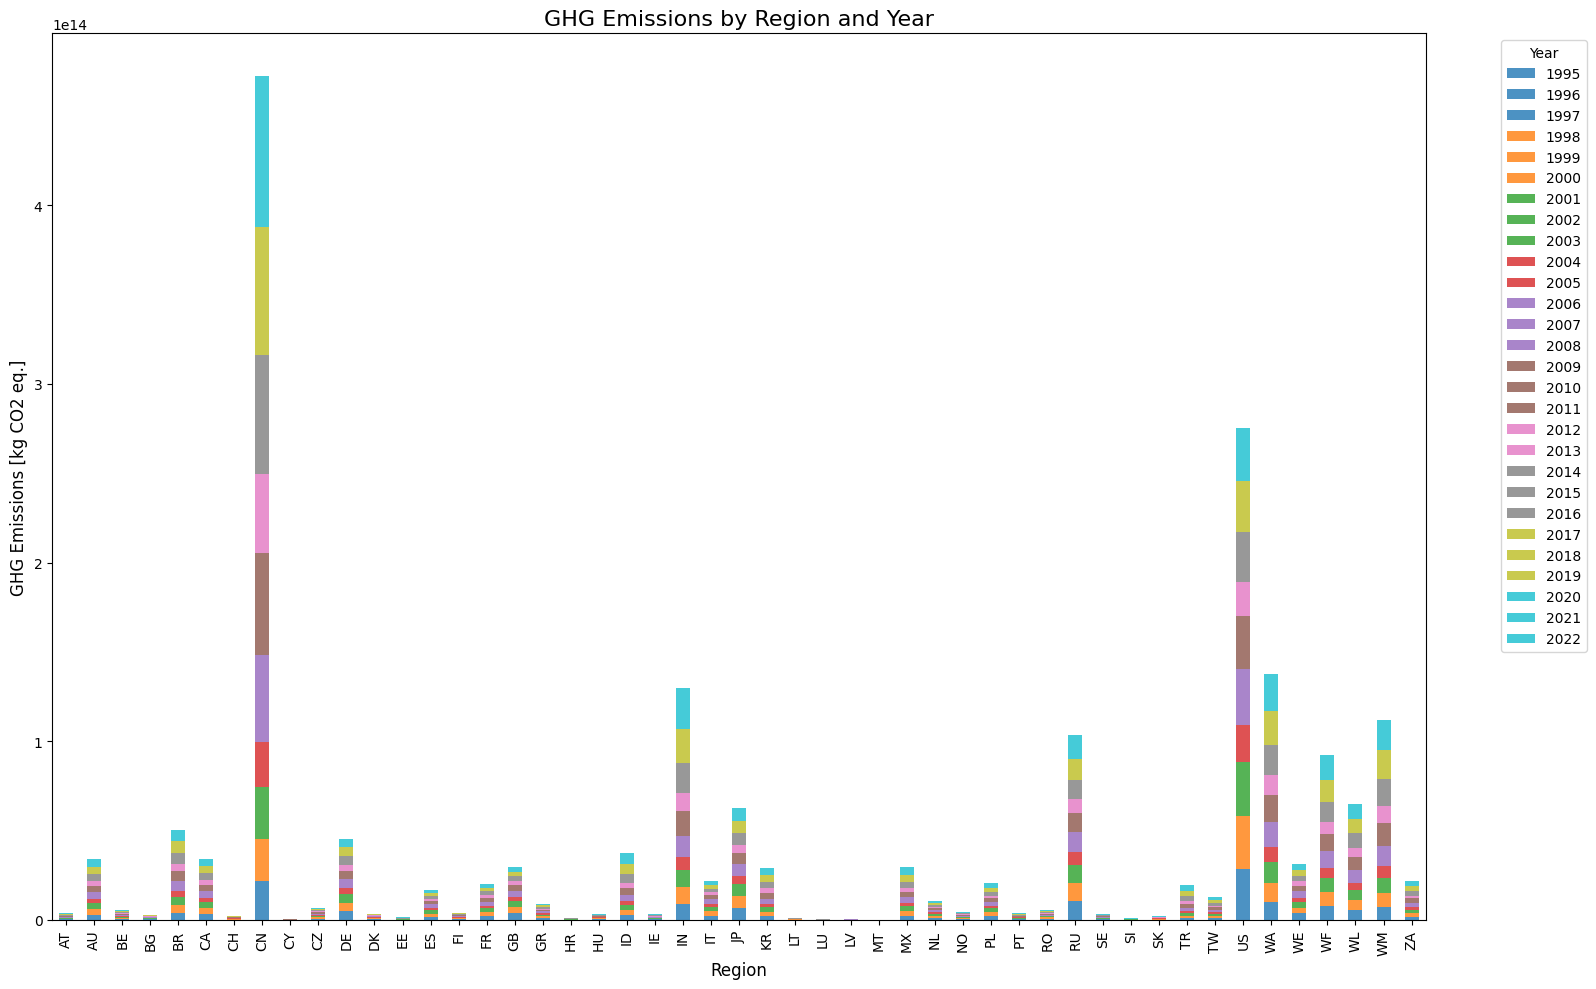

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# 对数据按region和Year分组，计算GHG emissions的总和
ghg_by_region_year = merged_df.groupby(['region', 'Year'])['GHG emissions [kg CO2 eq.]'].sum().reset_index()

# 创建透视表，以便绘制堆叠柱状图
ghg_pivot = ghg_by_region_year.pivot(index='region', columns='Year', values='GHG emissions [kg CO2 eq.]').fillna(0)

# 设置图形尺寸
plt.figure(figsize=(16, 10))

# 绘制堆叠柱状图
ghg_pivot.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab10', alpha=0.8)

# 添加图表标题和坐标轴标签
plt.title('GHG Emissions by Region and Year', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('GHG Emissions [kg CO2 eq.]', fontsize=12)

# 调整X轴标签
plt.xticks(rotation=90)

# 添加图例
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.tight_layout()
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

# 假设 merged_df 是您的数据框
# 1. 对 region 和 sector 进行标签化
label_encoder_region = LabelEncoder()
label_encoder_sector = LabelEncoder()

merged_df['region_encoded'] = label_encoder_region.fit_transform(merged_df['region'])
merged_df['sector_encoded'] = label_encoder_sector.fit_transform(merged_df['sector'])

# 2. 对数值字段进行归一化
scaler = MinMaxScaler()
columns_to_normalize = ['Value Added [M.EUR]', 'Employment [1000 p.]',
                        'GHG emissions [kg CO2 eq.]', 'Energy Carrier Net Total [TJ]']

# 新增一列表示归一化数据
normalized_data = scaler.fit_transform(merged_df[columns_to_normalize])
normalized_df = pd.DataFrame(normalized_data, columns=[f'{col}_normalized' for col in columns_to_normalize])

# 将归一化数据添加到原始数据框中
merged_df = pd.concat([merged_df, normalized_df], axis=1)

# 查看结果
print(merged_df.head())


  region                                  sector  Value Added [M.EUR]  \
0     AT                    Cultivation of wheat           183.111889   
1     AT        Cultivation of cereal grains nec           402.230580   
2     AT  Cultivation of vegetables, fruit, nuts           830.212738   
3     AT                Cultivation of oil seeds           101.970543   
4     AT   Cultivation of sugar cane, sugar beet            31.763189   

   Employment [1000 p.]  GHG emissions [kg CO2 eq.]  \
0             13.187442                3.478740e+08   
1             25.673157                6.847488e+08   
2             48.616948                2.389458e+08   
3              2.867099                1.197554e+08   
4              3.142473                7.751692e+07   

   Energy Carrier Net Total [TJ]  Year  region_encoded  sector_encoded  \
0                         2070.0  1995               0              56   
1                         3640.0  1995               0              49   
2       

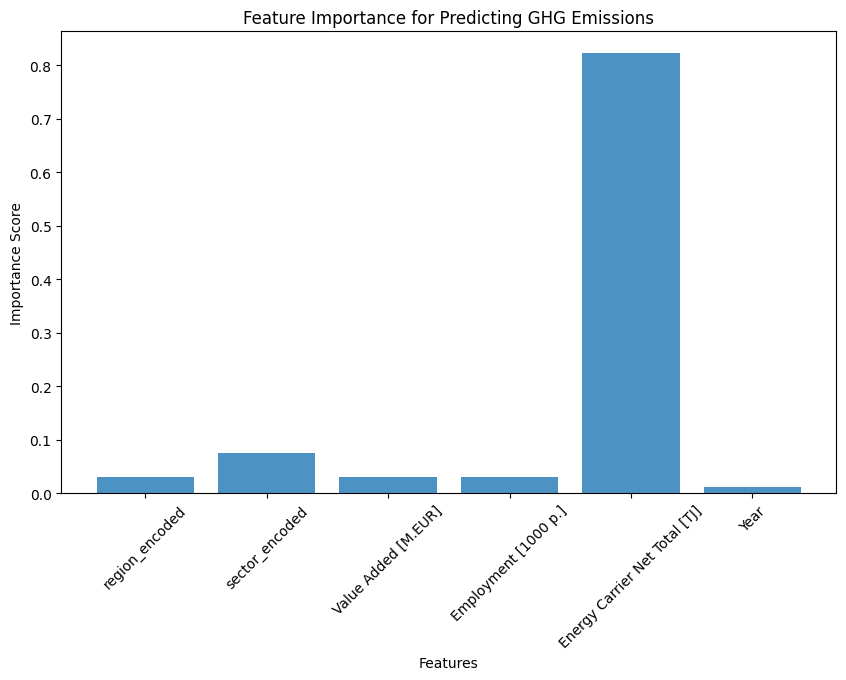

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# 假设 merged_df 是已处理好的数据
# 1. 特征与目标值
features = ['region_encoded', 'sector_encoded', 'Value Added [M.EUR]',
            'Employment [1000 p.]', 'Energy Carrier Net Total [TJ]', 'Year']
target = 'GHG emissions [kg CO2 eq.]'

X = merged_df[features]
y = merged_df[target]

# 2. 数据分割（训练集与测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 训练随机森林模型
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

# 5. 提取特征重要性
feature_importances = model.feature_importances_

# 6. 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Predicting GHG Emissions')
plt.xticks(rotation=45)
plt.show()


In [10]:
# 打印所有列名
print(merged_df.columns)


Index(['region', 'sector', 'Value Added [M.EUR]', 'Employment [1000 p.]',
       'GHG emissions [kg CO2 eq.]', 'Energy Carrier Net Total [TJ]', 'Year',
       'region_encoded', 'sector_encoded', 'Value Added [M.EUR]_normalized',
       'Employment [1000 p.]_normalized',
       'GHG emissions [kg CO2 eq.]_normalized',
       'Energy Carrier Net Total [TJ]_normalized'],
      dtype='object')


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# 假设 merged_df 是您的数据框
# 1. 数据预处理
features = ['region_encoded', 'sector_encoded', 'Value Added [M.EUR]',
            'Employment [1000 p.]', 'Energy Carrier Net Total [TJ]']
target = 'GHG emissions [kg CO2 eq.]'

# 按 region 和 sector 分组并排序
merged_df = merged_df.sort_values(by=['region_encoded', 'sector_encoded', 'Year'])

# 归一化特征
scaler = MinMaxScaler()
merged_df[features + [target]] = scaler.fit_transform(merged_df[features + [target]])

# 创建时间序列数据
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # 输入特征
        y.append(data[i+seq_length, -1])    # 目标值
    return np.array(X), np.array(y)

seq_length = 5  # 序列长度
grouped = merged_df.groupby(['region_encoded', 'sector_encoded'])

X, y = [], []
for _, group in grouped:
    group_values = group[features + [target]].values
    X_seq, y_seq = create_sequences(group_values, seq_length)
    X.extend(X_seq)
    y.extend(y_seq)

X = np.array(X)
y = np.array(y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 构建 LSTM 模型
model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, X.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # 输出一个值
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# 3. 训练模型
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32)

# 4. 评估模型
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# 5. 预测未来 GHG emissions
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 64)               │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

8165/8165 ━━━━━━━━━━━━━━━━━━━━ 91s 11ms/step - loss: 7.7152e-05 - mae: 0.0023 - val_loss: 4.0940e-05 - val_mae: 0.0014
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 4.3625e-05 - mae: 0.0015
Test Loss: 4.093964889761992e-05, Test MAE: 0.001446311711333692
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step


In [12]:
# Step 1: Prepare the input data for 2023 prediction
def prepare_2023_input(data, seq_length, features):
    # Ensure data is sorted correctly
    data = data.sort_values(by=['region_encoded', 'sector_encoded', 'Year'])
    grouped = data.groupby(['region_encoded', 'sector_encoded'])

    input_sequences = []
    regions_sectors = []

    for (region, sector), group in grouped:
        group_values = group[features].values
        if len(group_values) >= seq_length:
            sequence = group_values[-seq_length:]  # Take the last `seq_length` rows
            input_sequences.append(sequence)

            regions_inde = scaler.inverse_transform(np.array([[region]*6]))
            sectors_inde = scaler.inverse_transform(np.array([[sector]*6]))
            region = regions_inde[0][0]
            sector = sectors_inde[0][1]
            regions_sectors.append((int(region), int(sector)))  # Ensure integer types

    return np.array(input_sequences), regions_sectors


# Extract the input sequences for 2023 prediction
X_2023, regions_sectors = prepare_2023_input(merged_df, seq_length, features)

# Step 2: Predict 2023 GHG emissions
predictions_2023 = model.predict(X_2023)

# Step 3: Denormalize the predictions
predicted_emissions = scaler.inverse_transform(
    np.hstack([np.zeros((len(predictions_2023), len(features))), predictions_2023])
)[:, -1]

# Map predictions back to regions and sectors
results = []
for (region, sector), emission in zip(regions_sectors, predicted_emissions):
    results.append({
        'region': label_encoder_region.inverse_transform([region])[0],  # Ensure region is an integer
        'sector': label_encoder_sector.inverse_transform([sector])[0],  # Ensure sector is an integer
        'predicted_GHG_emission_2023': emission
    })

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(results)

# Display the predictions
print(predictions_df)


458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
      region                                             sector  \
0         AT  Activities auxiliary to financial intermediati...   
1         AT  Activities of membership organisation n.e.c. (91)   
2         AT                      Additives/Blending Components   
3         AT                                 Air transport (62)   
4         AT                        Air transport services (62)   
...      ...                                                ...   
14646     ZA  Wholesale trade and commission trade services,...   
14647     ZA  Wholesale trade and commission trade, except o...   
14648     ZA  Wood and products of wood and cork (except fur...   
14649     ZA                            Wool, silk-worm cocoons   
14650     ZA                products of Vegetable oils and fats   

       predicted_GHG_emission_2023  
0                     3.961350e+09  
1                     4.062062e+09  
2                     3.920943e+09  
3     

In [ ]:
regions_sectors

In [ ]:
print(merged_df.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
          featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
139  Admin-0 country          1          2      China    CH1         1      2   

        TYPE TLC  ADMIN  ... FCLASS_PL  FCLASS_GR FCLASS_IT FCLASS_NL  \
139  Country   1  China  ...      None       None      None      None   

     FCLASS_SE FCLASS_BD FCLASS_UA  \
139       None      None      None   

                                              geometry region  \
139  MULTIPOLYGON (((109.47521 18.1977, 108.65521 1...     CN   

    GHG emissions [kg CO2 eq.]  
139               2.774869e+13  

[1 rows x 171 columns]


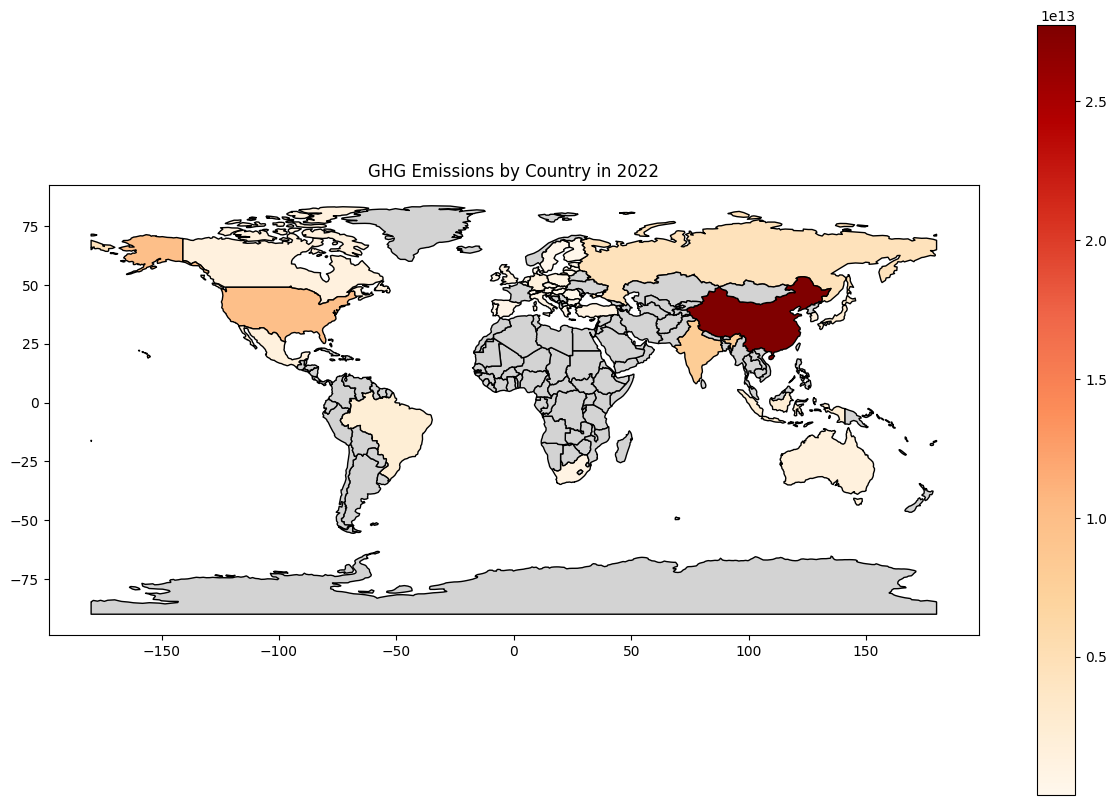

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
shapefile_path = "/content/drive/MyDrive/A&O/ne_110m_admin_0_countries.shp"  # Replace with the actual path
world = gpd.read_file(shapefile_path)

# Ensure country codes in the shapefile match the predictions
# For example, the shapefile might use 'ISO_A2' (2-letter codes)
# Check available columns in `world` to find the correct one
print(world.columns)

# Merge the map data with the predictions DataFrame
# Ensure 'region' in predictions_df matches the column in the shapefile (e.g., 'ISO_A2')
# 合并地图数据和 GHG 数据
map_data = world.merge(ghg_by_region, how="left", left_on="ISO_A2", right_on="region")

# 如果有不匹配区域，手动调整匹配字段
map_data.loc[map_data["ISO_A2"] == "CN", "region"] = "CN"

# 检查合并后的 map_data
print(map_data[map_data["ISO_A2"] == "CN"])  # 验证 CN 是否存在

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map_data.plot(
    column="GHG emissions [kg CO2 eq.]",
    cmap="OrRd",
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "No Data"
    },
    edgecolor="black"
)
ax.set_title("GHG Emissions by Country in 2022")
plt.show()



In [23]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 改进后的处理与建模逻辑
def preprocess_and_train_model(merged_df, target_column='GHG emissions [kg CO2 eq.]'):
    """
    预处理数据并训练LightGBM模型。
    """
    # 分离特征与目标
    X = merged_df.drop(columns=[target_column])
    y = merged_df[target_column]

    # 确定数值型和分类型特征
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # 数值型特征处理：填充缺失值
    numeric_transformer = SimpleImputer(strategy='mean')

    # 分类特征处理：编码和填充缺失值
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # 构建预处理流水线
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # 数据分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 建立模型流水线
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', lgb.LGBMRegressor(n_estimators=100, random_state=42))
    ])

    # 模型训练
    model.fit(X_train, y_train)

    # 模型评估
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    return model

# 模型预测
def predict_with_missing_features(model, input_data):
    """
    使用训练好的模型进行预测，支持部分特征缺失。
    """
    return model.predict(input_data)

# 主函数调用
target_column = 'GHG emissions [kg CO2 eq.]'
trained_model = preprocess_and_train_model(merged_df, target_column)

# 测试预测
test_data = merged_df.iloc[:5].copy()
test_data.iloc[0, :3] = None  # 模拟部分特征缺失
predictions = predict_with_missing_features(trained_model, test_data)
print(f"Predictions with missing features: {predictions}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 320392, number of used features: 10
[LightGBM] [Info] Start training from score 0.001310
Mean Squared Error: 2.6845650676250854e-06
Predictions with missing features: [6.99926233e-06 6.99926233e-06 6.99926233e-06 6.99926233e-06
 6.99926233e-06]
